## Observations and Insights 

In [2]:
# Dependencies and Setup

%matplotlib inline


import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [3]:
pd.options.display.float_format = "{:,.3f}".format

In [4]:
# This program examines the eficacy in treating SCC tumors using several drug treatments including Capomulin
# This analysis was completed by F. A. Barillas

In [5]:
# Verifiying Mouse Data Dataframe Structure
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [6]:
# Verifying Study Results Dataframe Structure
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000,0
1,f932,0,45.000,0
2,g107,0,45.000,0
3,a457,0,45.000,0
4,c819,0,45.000,0
...,...,...,...,...
1888,r944,45,41.582,2
1889,u364,45,31.024,3
1890,p438,45,61.434,1
1891,x773,45,58.635,4


In [7]:
# Cleaning up column names in both dataframes
mouse_metadata.columns = mouse_metadata.columns.str.replace(" ","_")
study_results.columns = study_results.columns.str.replace(" ","_")

In [8]:
# Checking the number of mice.
len(mouse_metadata.Mouse_ID)

249

In [9]:
# Merge Mouse Data with Study Data
study_results = pd.merge(mouse_metadata, study_results, how = "left", on = "Mouse_ID")
study_results

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000,0
1,k403,Ramicane,Male,21,16,5,38.826,0
2,k403,Ramicane,Male,21,16,10,35.014,1
3,k403,Ramicane,Male,21,16,15,34.224,1
4,k403,Ramicane,Male,21,16,20,32.998,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.146,2
1889,z969,Naftisol,Male,9,30,30,65.841,3
1890,z969,Naftisol,Male,9,30,35,69.176,4
1891,z969,Naftisol,Male,9,30,40,70.315,4


In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_results.loc[study_results.duplicated(subset=['Mouse_ID','Timepoint'], keep = False)]
duplicate_mice = duplicate_mice.Mouse_ID.unique()
duplicate_mice


array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_results = study_results.loc[study_results.duplicated(subset=['Mouse_ID','Timepoint'],keep = False)]
duplicated_results

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
908,g989,Propriva,Female,21,26,0,45.000,0
909,g989,Propriva,Female,21,26,0,45.000,0
910,g989,Propriva,Female,21,26,5,48.787,0
911,g989,Propriva,Female,21,26,5,47.570,0
912,g989,Propriva,Female,21,26,10,51.745,0
913,g989,Propriva,Female,21,26,10,49.881,0
914,g989,Propriva,Female,21,26,15,51.326,1
915,g989,Propriva,Female,21,26,15,53.442,0
916,g989,Propriva,Female,21,26,20,55.326,1
917,g989,Propriva,Female,21,26,20,54.658,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_results = study_results.loc[study_results.Mouse_ID != 'g989']
clean_study_results

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000,0
1,k403,Ramicane,Male,21,16,5,38.826,0
2,k403,Ramicane,Male,21,16,10,35.014,1
3,k403,Ramicane,Male,21,16,15,34.224,1
4,k403,Ramicane,Male,21,16,20,32.998,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.146,2
1889,z969,Naftisol,Male,9,30,30,65.841,3
1890,z969,Naftisol,Male,9,30,35,69.176,4
1891,z969,Naftisol,Male,9,30,40,70.315,4


In [13]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_results.Mouse_ID.unique())

248

# CLEAN STUDY RESULTS DATAFRAME WITHOUT DUPLICATES

In [14]:
clean_study_results.rename(columns={'Weight_(g)':'Weight_g', 'Tumor_Volume_(mm3)':'Tumor_Volume_mm3'}, inplace =True)


C:\Users\Corsair_Barillas\anaconda364\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen

In [17]:
# Undertanding Trials Per Regimen
Measurements_Per_Regimen = clean_study_results.groupby('Drug_Regimen').Drug_Regimen.count()


In [18]:
Mean_Tumor_Volume = clean_study_results.groupby('Drug_Regimen').Tumor_Volume_mm3.mean()


In [19]:
Median_Tumor_Volume = clean_study_results.groupby('Drug_Regimen').Tumor_Volume_mm3.median()


In [20]:
Variance_Tumor_Volume = clean_study_results.groupby('Drug_Regimen').Tumor_Volume_mm3.var()


In [21]:
StDev_Tumor_Volume = clean_study_results.groupby('Drug_Regimen').Tumor_Volume_mm3.std()


In [22]:
SEM_Tumor_Volume = clean_study_results.groupby('Drug_Regimen').Tumor_Volume_mm3.sem()


In [23]:
summary_stats_df=pd.concat([Measurements_Per_Regimen, Mean_Tumor_Volume, Median_Tumor_Volume, Variance_Tumor_Volume, StDev_Tumor_Volume, SEM_Tumor_Volume], axis =1)
summary_stats_df.columns=['#Measurements','Average','Median','Variance','StDev','SEM']              


summary_stats_df.reset_index(inplace = True)

# SUMMARY STATISTICS BY DRUG REGIMEN

In [24]:
summary_stats_df

,Drug_Regimen,#Measurements,Average,Median,Variance,StDev,SEM
0,Capomulin,230,40.676,41.558,24.948,4.995,0.329
1,Ceftamin,178,52.591,51.776,39.290,6.268,0.470
2,Infubinol,178,52.885,51.821,43.129,6.567,0.492
3,Ketapril,188,55.236,53.699,68.554,8.280,0.604
4,Naftisol,186,54.332,52.509,66.173,8.135,0.596
5,Placebo,181,54.034,52.289,61.168,7.821,0.581
6,Propriva,148,52.321,50.446,43.852,6.622,0.544
7,Ramicane,228,40.217,40.673,23.487,4.846,0.321
8,Stelasyn,181,54.233,52.432,59.451,7.710,0.573
9,Zoniferol,182,53.237,51.818,48.533,6.967,0.516


# Summary Table Using Aggregation

In [25]:
# Using the aggregation method, produce the same summary statistics in a single line
# "count" in this case is the number of measurements taken per drug regimen

clean_study_results.groupby("Drug_Regimen").agg({'Tumor_Volume_mm3':['count','mean','median','var','std','sem']})

Tumor_Volume_mm3                                 
                        count   mean median    var   std   sem
Drug_Regimen                                                  
Capomulin                 230 40.676 41.558 24.948 4.995 0.329
Ceftamin                  178 52.591 51.776 39.290 6.268 0.470
Infubinol                 178 52.885 51.821 43.129 6.567 0.492
Ketapril                  188 55.236 53.699 68.554 8.280 0.604
Naftisol                  186 54.332 52.509 66.173 8.135 0.596
Placebo                   181 54.034 52.289 61.168 7.821 0.581
Propriva                  148 52.321 50.446 43.852 6.622 0.544
Ramicane                  228 40.217 40.673 23.487 4.846 0.321
Stelasyn                  181 54.233 52.432 59.451 7.710 0.573
Zoniferol                 182 53.237 51.818 48.533 6.967 0.516

## Bar and Pie Charts

([<matplotlib.axis.XTick at 0x279361cedd8>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

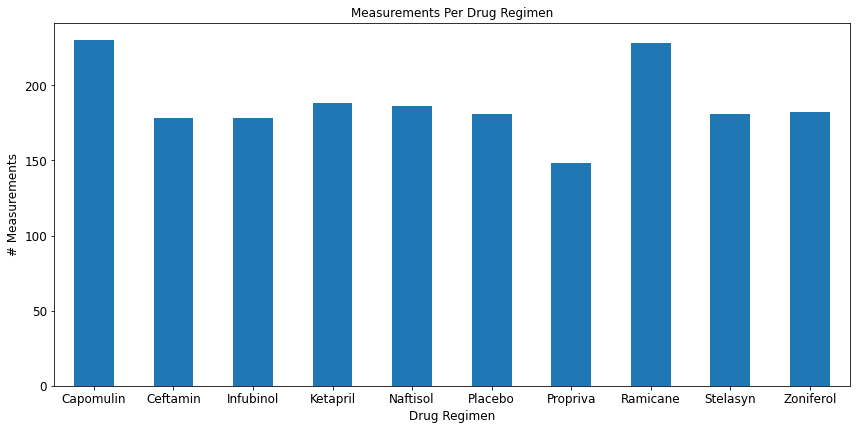

In [26]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

summary_stats_df['#Measurements'].plot(kind='bar', figsize=(12,6), title ="Measurements Per Drug Regimen",
                                       fontsize = 12, style = "bold")
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("# Measurements", fontsize = 12)
plt.tight_layout()

x_axis = np.arange(len(summary_stats_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, summary_stats_df["Drug_Regimen"], rotation = False)

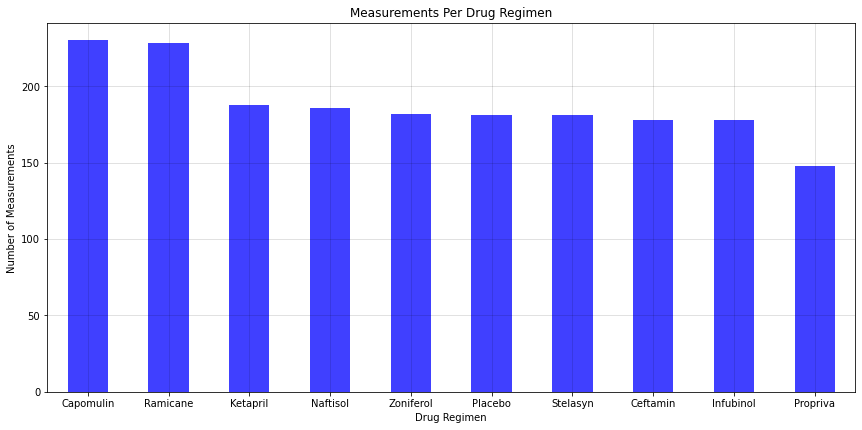

In [27]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
summary_stats_df.sort_values('#Measurements', inplace = True, ascending = False)

x_axis = summary_stats_df['Drug_Regimen']
y_values=summary_stats_df['#Measurements']

tick_locations = [value for value in x_axis]

fig1 = plt.figure(figsize =(12,6))

plt.bar(x_axis, y_values, color = 'b', alpha = 0.75, align = "center", width = 0.5)
plt.title("Measurements Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.xlim(-0.5, len(x_axis)-0.5)

plt.grid(color='k', alpha = 0.15)
plt.tight_layout(pad=0.8, w_pad=1.4, h_pad=1.0)


In [28]:
#Gender Distribution
new_mouse_metadata = mouse_metadata.loc[mouse_metadata.Mouse_ID != 'g989']
male_mice = len(new_mouse_metadata.loc[new_mouse_metadata.Sex == 'Male'])
male_mice

125

In [29]:
female_mice = len(new_mouse_metadata.loc[new_mouse_metadata.Sex == 'Female'])
female_mice

123

<Figure size 432x288 with 0 Axes>

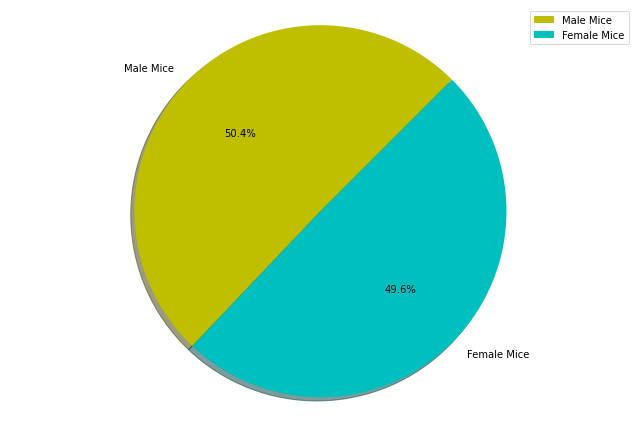

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig2 = plt.figure()
fig2.suptitle('Mice Gender Split', fontsize = 14, fontweight = 'bold')


labels = ["Male Mice", "Female Mice" ]
categories = [male_mice, female_mice]
colors = ["y","c"]
explode = (0,0)
fig, ax = plt.subplots(figsize = (9,6))

plt.pie(categories, explode,labels, colors, autopct='%1.1f%%', shadow= True, startangle = 45)
plt.legend()
plt.axis("Equal")
plt.tight_layout()
plt.show()


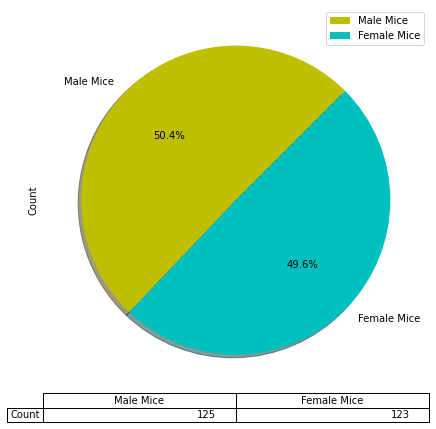

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df=pd.DataFrame({'Count':categories},index=labels)
colors = ["y","c"]
fig=gender_df.plot(kind='pie', y='Count', figsize =(10,6), colors = colors ,startangle = 45, shadow = True, table = True, autopct='%1.1f%%')
            


plt.tight_layout()




## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [34]:
# Start by getting the last (greatest) timepoint for each mouse per Regimen
last_timepoint_per_mouse = clean_study_results.groupby("Mouse_ID").Timepoint.max()
last_timepoint_per_mouse

Mouse_ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

# SUMMARY TABLE WITH LAST TIMEPOINT PER MOUSE

In [35]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_volume_df = pd.merge(clean_study_results, last_timepoint_per_mouse, "right", on = ['Mouse_ID','Timepoint'])
final_volume_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,45,22.050,1
1,s185,Capomulin,Female,3,17,45,23.344,1
2,x401,Capomulin,Female,16,15,45,28.484,0
3,m601,Capomulin,Male,22,17,45,28.431,1
4,g791,Ramicane,Male,11,16,45,29.128,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.935,0
244,z435,Propriva,Female,12,26,10,48.711,0
245,z581,Infubinol,Female,24,25,45,62.754,3
246,z795,Naftisol,Female,13,29,45,65.741,3


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
selected_drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [37]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data =[]

In [38]:
# Locate the rows which contain mice on each drug and get the tumor volumes
# Create individual dataframes per selected drug regimens
# These dataframes will be easier to manipulate for more in-depth drug effectiveness evaluations

In [39]:
Capomulin_df = final_volume_df[final_volume_df.Drug_Regimen == "Capomulin"]
Capomulin_trials = len(Capomulin_df)
    
Ramicane_df = final_volume_df[final_volume_df.Drug_Regimen == "Ramicane"]
Ramicane_trials = len(Ramicane_df)

Infubinol_df = final_volume_df[final_volume_df.Drug_Regimen == "Infubinol"]
Infubinol_trials = len(Infubinol_df)

Ceftamin_df = final_volume_df[final_volume_df.Drug_Regimen == "Ceftamin"]
Ceftamin_trials = len(Ceftamin_df)

In [40]:
# Determine outliers using upper and lower bounds
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

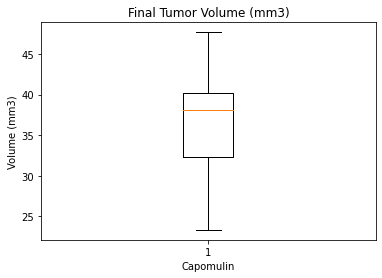

In [41]:
# Capomulin Statistics and Box Plot
Capo_tumor_volumes = Capomulin_df['Tumor_Volume_mm3']
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm3)')
ax1.set_ylabel('Volume (mm3)')
ax1.set_xlabel('Capomulin')
ax1.boxplot(Capo_tumor_volumes)
plt.show()

In [42]:
Capomulin_quartiles = Capo_tumor_volumes.quantile([.25,.5,.75])

Capomulin_upperQ = Capomulin_quartiles[0.75]
Capomulin_median = Capomulin_quartiles[0.5]
Capomulin_lowerQ = Capomulin_quartiles[0.25]
Capomulin_IQR = Capomulin_upperQ - Capomulin_lowerQ

print(f"The upper quartile of Capomulin is: {Capomulin_upperQ}")
print(f"The the median of Capomulin is:     {Capomulin_median} ")
print(f"The lower quartile of Capomulin is: {Capomulin_lowerQ}")
print(f"The IQR of Capomulin is:            {Capomulin_IQR}")


The upper quartile of Capomulin is: 40.1592203
The the median of Capomulin is:     38.125164399999996 
The lower quartile of Capomulin is: 32.37735684
The IQR of Capomulin is:            7.781863460000004


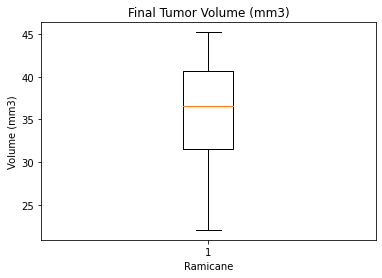

In [43]:
Rami_tumor_volumes = Ramicane_df['Tumor_Volume_mm3']
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm3)')
ax1.set_ylabel('Volume (mm3)')
ax1.set_xlabel('Ramicane')
ax1.boxplot(Rami_tumor_volumes)
plt.show()

In [44]:
Ramicane_quartiles = Rami_tumor_volumes.quantile([.25,.5,.75])

Ramicane_upperQ = Ramicane_quartiles[0.75]
Ramicane_median = Ramicane_quartiles[0.5]
Ramicane_lowerQ = Ramicane_quartiles[0.25]
Ramicane_IQR = Ramicane_upperQ - Ramicane_lowerQ

print(f"The upper quartile of Ramicane is: {Ramicane_upperQ}")
print(f"The the median of Ramicane is:     {Ramicane_median} ")
print(f"The lower quartile of Ramicane is: {Ramicane_lowerQ}")
print(f"The IQR of Ramicane is:            {Ramicane_IQR}")

The upper quartile of Ramicane is: 40.65900627
The the median of Ramicane is:     36.56165229 
The lower quartile of Ramicane is: 31.56046955
The IQR of Ramicane is:            9.098536719999998


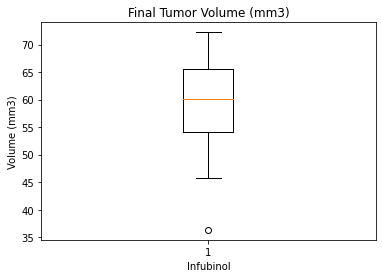

In [45]:
Infu_tumor_volumes = Infubinol_df['Tumor_Volume_mm3']
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm3)')
ax1.set_ylabel('Volume (mm3)')
ax1.set_xlabel('Infubinol')
ax1.boxplot(Infu_tumor_volumes)
plt.show()

In [46]:
Infubinol_quartiles = Infu_tumor_volumes.quantile([.25,.5,.75])

Infubinol_upperQ = Infubinol_quartiles[0.75]
Infubinol_median = Infubinol_quartiles[0.5]
Infubinol_lowerQ = Infubinol_quartiles[0.25]
Infubinol_IQR = Infubinol_upperQ - Infubinol_lowerQ

print(f"The upper quartile of Infubinol is: {Infubinol_upperQ}")
print(f"The the median of Infubinol is:     {Infubinol_median} ")
print(f"The lower quartile of Infubinol is: {Infubinol_lowerQ}")
print(f"The IQR of Infubinol is:            {Infubinol_IQR}")

The upper quartile of Infubinol is: 65.52574285
The the median of Infubinol is:     60.16518046 
The lower quartile of Infubinol is: 54.04860769
The IQR of Infubinol is:            11.477135160000003


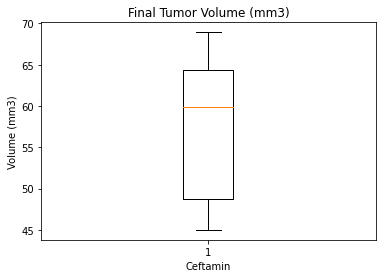

In [47]:
Cefta_tumor_volumes = Ceftamin_df['Tumor_Volume_mm3']
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm3)')
ax1.set_ylabel('Volume (mm3)')
ax1.set_xlabel('Ceftamin')
ax1.boxplot(Cefta_tumor_volumes)
plt.show()

In [48]:
Ceftamin_quartiles = Cefta_tumor_volumes.quantile([.25,.5,.75])

Ceftamin_upperQ = Ceftamin_quartiles[0.75]
Ceftamin_median = Ceftamin_quartiles[0.5]
Ceftamin_lowerQ = Ceftamin_quartiles[0.25]
Ceftamin_IQR = Ceftamin_upperQ - Ceftamin_lowerQ

print(f"The upper quartile of Ceftamin is: {Ceftamin_upperQ}")
print(f"The the median of Ceftamin is:     {Ceftamin_median} ")
print(f"The lower quartile of Ceftamin is: {Ceftamin_lowerQ}")
print(f"The IQR of Ceftamin is:            {Ceftamin_IQR}")

The upper quartile of Ceftamin is: 64.29983003
The the median of Ceftamin is:     59.85195552 
The lower quartile of Ceftamin is: 48.72207785
The IQR of Ceftamin is:            15.577752179999997


# Extracting the Outlier Trials

In [49]:
# Establish Upper and Lower Bound for Outliers for All Selected Drug Regimens

Capo_upperbound = Capomulin_upperQ + 1.5*Capomulin_IQR
Capo_lowerbound = Capomulin_lowerQ - 1.5*Capomulin_IQR

Rami_upperbound = Ramicane_upperQ + 1.5*Ramicane_IQR
Rami_lowerbound = Ramicane_lowerQ - 1.5*Ramicane_IQR

Infu_upperbound = Infubinol_upperQ + 1.5*Infubinol_IQR
Infu_lowerbound = Infubinol_lowerQ - 1.5*Infubinol_IQR

Cefta_upperbound = Ceftamin_upperQ + 1.5*Ceftamin_IQR
Cefta_lowerbound = Ceftamin_lowerQ - 1.5*Ceftamin_IQR


In [50]:
Capo_outliers = Capomulin_df[(Capomulin_df.Tumor_Volume_mm3 < Capo_lowerbound) |
                             (Capomulin_df.Tumor_Volume_mm3 > Capo_upperbound)].Mouse_ID.count()

Rami_outliers = Ramicane_df[(Ramicane_df.Tumor_Volume_mm3 < Rami_lowerbound) |
                            (Ramicane_df.Tumor_Volume_mm3 > Rami_upperbound)].Mouse_ID.count()

Infu_outliers = Infubinol_df[(Infubinol_df.Tumor_Volume_mm3 < Infu_lowerbound) |
                             (Infubinol_df.Tumor_Volume_mm3 > Infu_upperbound)].Mouse_ID.count()

Cefta_outliers = Ceftamin_df[(Ceftamin_df.Tumor_Volume_mm3 < Cefta_lowerbound) |
                             (Ceftamin_df.Tumor_Volume_mm3 > Cefta_upperbound)].Mouse_ID.count()


In [51]:
print(f"Number of Capomulin Outliers: {Capo_outliers}")
print(f"Number of Ramicane Outliers: {Rami_outliers}")
print(f"Number of Infubinol Outliers: {Infu_outliers}")
print(f"Number of Ceftamin Outliers: {Cefta_outliers}")


Number of Capomulin Outliers: 0
Number of Ramicane Outliers: 0
Number of Infubinol Outliers: 1
Number of Ceftamin Outliers: 0


## Line and Scatter Plots

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df.head()

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
1,s185,Capomulin,Female,3,17,45,23.344,1
2,x401,Capomulin,Female,16,15,45,28.484,0
3,m601,Capomulin,Male,22,17,45,28.431,1
6,f966,Capomulin,Male,16,17,20,30.486,0
10,u364,Capomulin,Male,18,17,45,31.024,3


In [53]:
Capo_Mouse = 'm601'

In [54]:
Capo_Mouse_df = study_results.loc[study_results.Mouse_ID == Capo_Mouse]
Capo_Mouse_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
30,m601,Capomulin,Male,22,17,0,45.000,0
31,m601,Capomulin,Male,22,17,5,41.409,1
32,m601,Capomulin,Male,22,17,10,36.825,1
33,m601,Capomulin,Male,22,17,15,35.465,1
34,m601,Capomulin,Male,22,17,20,34.256,1
35,m601,Capomulin,Male,22,17,25,33.119,1
36,m601,Capomulin,Male,22,17,30,31.758,1
37,m601,Capomulin,Male,22,17,35,30.834,1
38,m601,Capomulin,Male,22,17,40,31.378,1
39,m601,Capomulin,Male,22,17,45,28.431,1


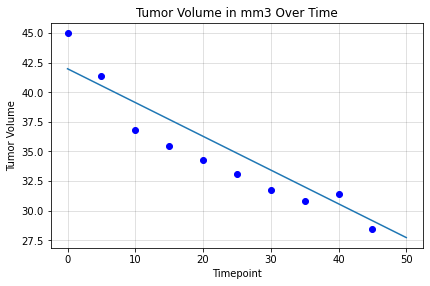

In [55]:
# Calculate the correlation coefficient and linear regression model for Timepoint vs Tumor Volume

plt.plot(Capo_Mouse_df['Timepoint'], Capo_Mouse_df['Tumor_Volume_(mm3)'],"bo")
plt.title("Tumor Volume in mm3 Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

plt.grid(color='k', alpha = 0.15)
plt.tight_layout(pad=0.8, w_pad=1.4, h_pad=1.0)

timepoint = Capo_Mouse_df['Timepoint']
volume2 = Capo_Mouse_df['Tumor_Volume_(mm3)']

volume_coeff = np.polyfit(timepoint, volume2 ,1)
v_m = volume_coeff[0]
v_b = volume_coeff[1]

plt.plot(np.linspace(0,50,10), v_m * timepoint + v_b)


plt.show()

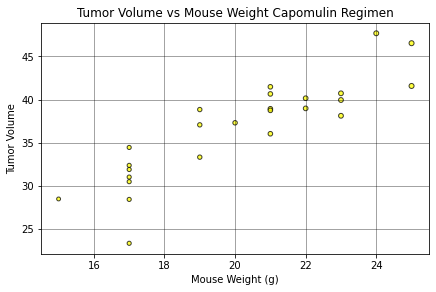

In [56]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_axis = Capomulin_df['Weight_g']
data = Capomulin_df['Tumor_Volume_mm3']
plt.scatter(x_axis,data,  marker ="o", facecolors= "yellow", edgecolors = "black", s=x_axis, alpha=0.75)

plt.title("Tumor Volume vs Mouse Weight Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume")

plt.grid(color='k', alpha = 0.45)
plt.tight_layout(pad=0.5, w_pad=2, h_pad=2)




## Correlation and Regression

In [57]:
# Calculate the correlation coefficient

Capomulin_correlation = st.pearsonr(x_axis,data)
print(f"The correlation between both factors is {round(Capomulin_correlation[0],2)}")

The correlation between both factors is 0.88


In [58]:
# Additional Evaluations by Student


In [59]:
# Evaluation of Tumor Volume at the End of each Drug Regiment (Last Timepoint)
final_volume_df.groupby("Drug_Regimen").agg({'Tumor_Volume_mm3':['count','mean','median','var','std','sem']})

Tumor_Volume_mm3                                   
                        count   mean median     var    std   sem
Drug_Regimen                                                    
Capomulin                  25 36.668 38.125  32.663  5.715 1.143
Ceftamin                   25 57.754 59.852  69.983  8.366 1.673
Infubinol                  25 58.178 60.165  74.011  8.603 1.721
Ketapril                   25 62.806 64.488  98.921  9.946 1.989
Naftisol                   25 61.206 63.283 106.030 10.297 2.059
Placebo                    25 60.508 62.031  78.760  8.875 1.775
Propriva                   24 56.494 55.592  70.823  8.416 1.718
Ramicane                   25 36.191 36.562  32.166  5.672 1.134
Stelasyn                   24 61.002 62.192  90.332  9.504 1.940
Zoniferol                  25 59.181 61.840  76.862  8.767 1.753